## Initialize Project

We'll initialize the project using the `HyFI.initialize` function. The function takes the following parameters:

- `project_name`: Name of the project to use.
- `project_description`: Description of the project that will be used.
- `project_root`: Root directory of the project.
- `project_workspace_name`: Name of the project's workspace directory.
- `global_hyfi_root`: Root directory of the global hyfi.
- `global_workspace_name`: Name of the global hierachical workspace directory.
- `num_workers`: Number of workers to run.
- `logging_level`: Log level for the log.
- `autotime`: Whether to automatically set time and / or keep track of run times.
- `retina`: Whether to use retina or not.
- `verbose`: Enables or disables logging

We'll check if we're running in Google Colab, and if so, we'll mount Google Drive.


In [1]:
from thematos import HyFI


if HyFI.is_colab():
    HyFI.mount_google_drive()

project_dir = HyFI.DotEnvConfig().DOTENV_DIR

h = HyFI.initialize(
    project_name="thematos",
    project_root=project_dir,
    logging_level="INFO",
    verbose=True,
)

print("project_dir:", h.project.root_dir)
print("project_workspace_dir:", h.project.workspace_dir)


/home/yjlee/.venvs/thematos/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO:hyfi.utils.notebooks:Google Colab not detected.
INFO:hyfi.utils.notebooks:Extension autotime not found. Install it first.
INFO:hyfi.joblib.joblib:initialized batcher with <hyfi.joblib.batch.batcher.Batcher object at 0x7fa417a535b0>
INFO:hyfi.main.config:HyFi project [thematos] initialized


project_dir: /raid/cis/yjlee/workspace/projects/thematos
project_workspace_dir: /raid/cis/yjlee/workspace/projects/thematos/workspace


In [2]:
from thematos.datasets import Corpus

data_file = (
    h.project.root_dir / "workspace/datasets/processed/khmer_tokenized/train.parquet"
)
data_load = {"data_file": data_file}
c = Corpus(data_load=data_load, id_col="id", text_col="text")

INFO:hyfi.task.batch:Initalized batch: corpus(4) in workspace/topic/corpus


In [3]:
c.load()

INFO:hyfi.utils.datasets.save:Saving dataframe to /raid/cis/yjlee/workspace/projects/thematos/tests/notebook/workspace/topic/corpus/corpus_doc_ids.parquet
INFO:hyfi.composer.config:Saving config to workspace/topic/corpus/configs/corpus(4)_config.json
INFO:hyfi.composer.config:Saving config to workspace/topic/corpus/configs/corpus(4)_config.yaml


In [4]:
from thematos.models import WordPrior

data_file = h.project.root_dir / "workspace/datasets/word_prior.yaml"


w = WordPrior(data_file=str(data_file), verbose=True)
w.priors


INFO:hyfi.task.batch:Initalized batch: corpus(5) in workspace/topic/corpus


{0: ['central', 'nbc', 'bank'], 1: ['rates', 'interest']}

In [5]:
from thematos.models import LdaModel

lda = LdaModel(corpus=c, wordprior=w, verbose=True)
lda.model_args.k = 10

INFO:hyfi.batch.batch:Setting seed to 2753866669
INFO:hyfi.batch.batch:Init batch - Batch name: batch, Batch num: 4
INFO:hyfi.task.batch:Initalized batch: batch(4) in workspace/topic/batch


In [6]:
lda.model

100%|██████████| 10/10 [00:45<00:00,  4.56s/it]


<Basic Info>
| LDAModel (current version: 0.12.5)
| 39713 docs, 20449512 words
| Total Vocabs: 245514, Used Vocabs: 61001
| Entropy of words: 7.32389
| Entropy of term-weighted words: 9.51058
| Removed Vocabs: <NA>
|
<Training Info>
| Iterations: 100, Burn-in steps: 0
| Optimization Interval: 10
| Log-likelihood per word: -9.59036
|
<Initial Parameters>
| tw: TermWeight.IDF
| min_cf: 5 (minimum collection frequency of words)
| min_df: 0 (minimum document frequency of words)
| rm_top: 0 (the number of top words to be removed)
| k: 10 (the number of topics between 1 ~ 32767)
| alpha: [0.1] (hyperparameter of Dirichlet distribution for document-topic, given as a single `float` in case of symmetric prior and as a list with length `k` of `float` in case of asymmetric prior.)
| eta: 0.01 (hyperparameter of Dirichlet distribution for topic-word)
| seed: 123 (random seed)
| trained in version 0.12.5
|
<Parameters>
| alpha (Dirichlet prior on the per-document topic distributions)
|  [0.14077315

INFO:hyfi.utils.datasets.save:Saving dataframe to /raid/cis/yjlee/workspace/projects/thematos/workspace/topic/batch/outputs/LDA_batch(4)_k(10)-ll_per_word-20230811_043029.csv
INFO:hyfi.utils.datasets.save: >> elapsed time to save data: 0:00:00.010972


          id    topic0    topic1    topic2    topic3    topic4    topic5  \
39708  48187  0.405782  0.017015  0.096637  0.084919  0.183741  0.184092   
39709  48132  0.395872  0.000073  0.433223  0.000100  0.057207  0.113215   
39710  48115  0.051860  0.000206  0.272515  0.462436  0.000165  0.081706   
39711  48085  0.206317  0.121916  0.113669  0.338321  0.170808  0.000074   
39712  48087  0.460030  0.033556  0.238928  0.018663  0.156450  0.000208   

         topic6    topic7    topic8    topic9  
39708  0.000435  0.001011  0.000050  0.026316  
39709  0.000110  0.000057  0.000051  0.000091  
39710  0.130547  0.000161  0.000145  0.000257  
39711  0.000146  0.000049  0.048621  0.000078  
39712  0.091665  0.000153  0.000124  0.000219  


INFO:hyfi.utils.datasets.save:Saving dataframe to /raid/cis/yjlee/workspace/projects/thematos/workspace/topic/batch/outputs/LDA_batch(4)_k(10)-topic_dists-20230811_043029.parquet
INFO:hyfi.utils.datasets.save: >> elapsed time to save data: 0:00:00.127211
INFO:hyfi.composer.config:Saving config to workspace/topic/batch/configs/batch(4)_config.json
INFO:hyfi.composer.config:Saving config to workspace/topic/batch/configs/batch(4)_config.yaml


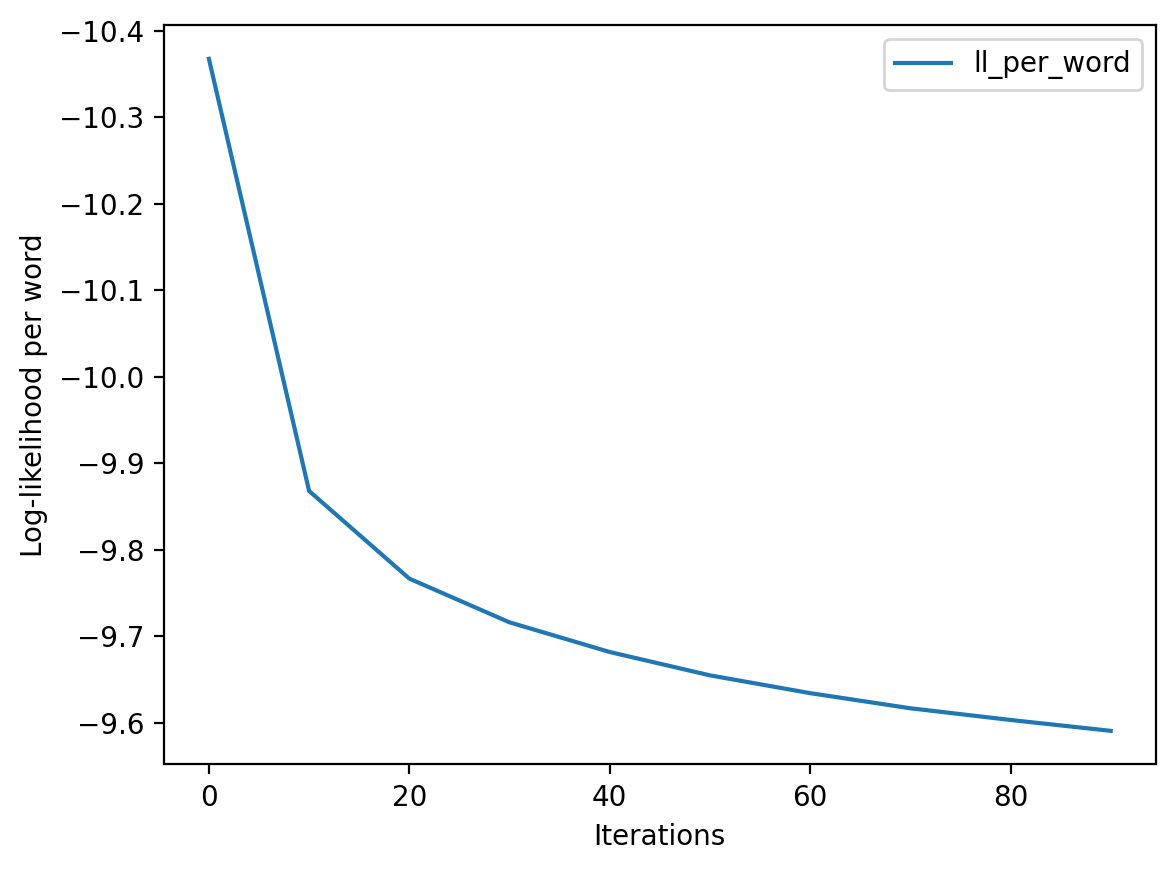

In [7]:
lda.train()

In [8]:
lda.save_model_summary()

In [9]:
len(lda.model.vocabs)


245514

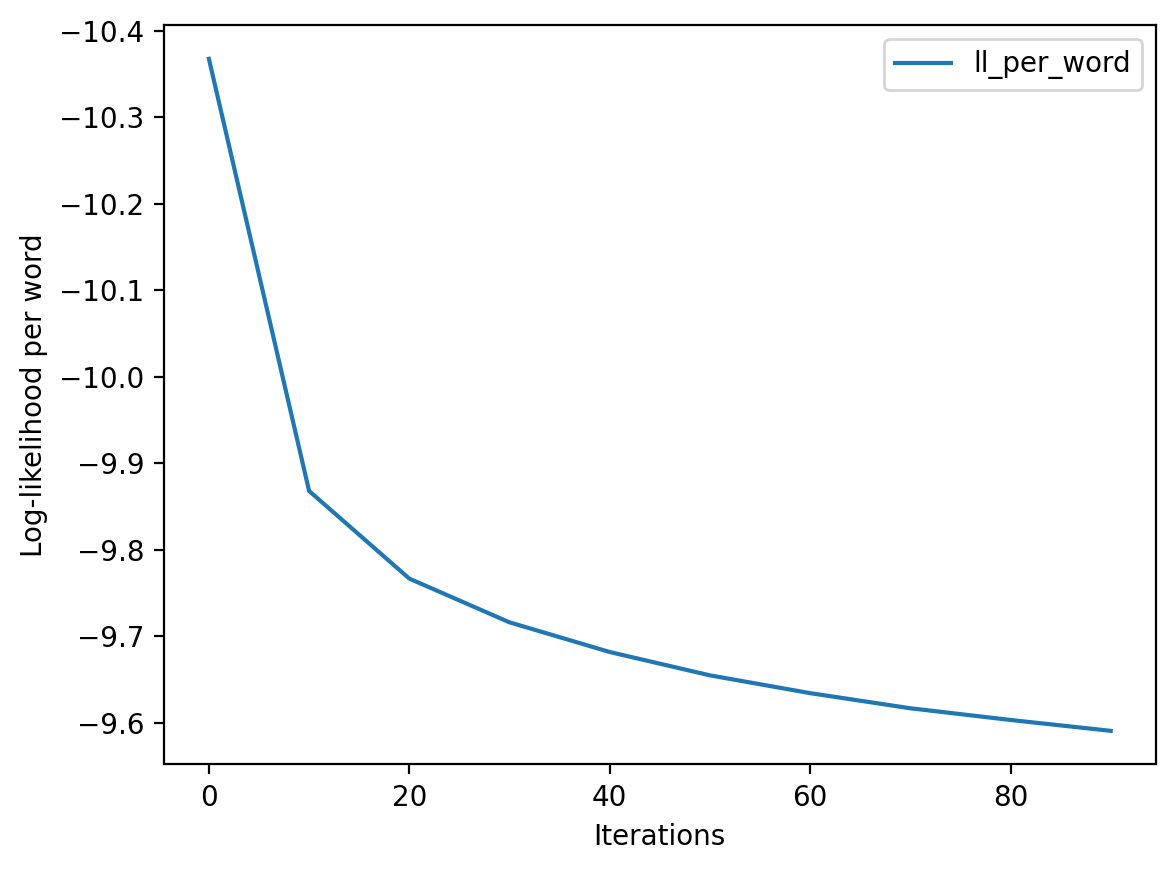

In [10]:
lda.plot_ll_per_words()

In [11]:
lda.eval_coherence_value()


In [12]:
lda.batch_name


'batch'

In [13]:
lda.batch_id


'batch(4)'